# << Cell 1 - Metadata >>

### Course: Signals and Systems — Programming Section (Python)

**Full Name :** Farnoosh Afshar  

**Student ID :** 402120873

**source :** *Signals and Systems Laboratory with MATLAB*

**Problem Number (Chapter.section.question_num):** **5.14.5**

# << Cell 2 - Upload & display question image >>

## Problem Statement (Image)
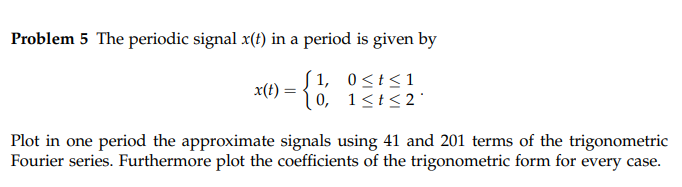

# << Cell 3 - Assumptions & method >>

### Assumptions for Question 5

- The signal \( x(t) \) is periodic with period \( T = 2 \).
- Within one period, \( x(t) = 1 \) for \( 0 \leq t \leq 1 \), and \( x(t) = 0 \) for \( 1 < t \leq 2 \).
- The signal is defined using Heaviside step functions for symbolic integration.
- The Fourier series is computed in trigonometric form using sine and cosine coefficients.

### Methods for Question 5
- Define \( x(t) \) symbolically using Heaviside functions:  
  \( x(t) = \text{heaviside}(t) - \text{heaviside}(t - 1) \)
- Set the fundamental period \( T = 2 \), and compute the angular frequency \( \omega = \frac{2\pi}{T} \).
- Compute the Fourier coefficients:
  - \( a_0 \): DC component
  - \( b_n \): cosine coefficients (expected to be zero due to signal symmetry)
  - \( c_n \): sine coefficients
- Use symbolic integration to compute each coefficient.
- Plot the coefficients \( b_n \) and \( c_n \) for \( n = 1 \) to 200.
- Construct the Fourier approximation using 41 and 201 terms and plot the result over one period.


# << Cell 4 - Solution Section >>

### Cell 1: Define variables and the signal
We import libraries, define symbolic variables, and construct the signal x(t) using Heaviside.


In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy.integrate as integrate

t = sp.symbols('t', real=True)  # symbolic time variable
T = 2                           # fundamental period
w0 = 2 * sp.pi / T              # fundamental frequency

# Define x(t) using Heaviside step functions
x_t = sp.Heaviside(t) - sp.Heaviside(t - 1)


### Cell 2: Fourier coefficient and approximation functions
We define helper functions to compute Fourier coefficients numerically and to build the Fourier approximation.


In [ ]:
def compute_fourier_coeffs_numeric(N):
    # DC component a0
    a0 = (1/T) * integrate.quad(lambda tt: 1 if 0 <= tt <= 1 else 0, 0, T)[0]

    an = []
    bn = []
    cn = []
    for k in range(1, N+1):
        # Cosine coefficient
        val_an = (1/T) * integrate.quad(lambda tt: (1 if 0 <= tt <= 1 else 0) * np.cos(k*float(w0)*tt), 0, T)[0]
        an.append(val_an)

        # Sine coefficient
        val_bn = (1/T) * integrate.quad(lambda tt: (1 if 0 <= tt <= 1 else 0) * np.sin(k*float(w0)*tt), 0, T)[0]
        bn.append(val_bn)

    # Complex coefficients
    for k in range(-N, N+1):
        val_cn = (1/T) * integrate.quad(lambda tt: (1 if 0 <= tt <= 1 else 0) * np.exp(-1j*k*float(w0)*tt), 0, T)[0]
        cn.append(val_cn)

    return a0, an, bn, cn

def fourier_approx(t_vals, a0, an, bn, N):
    approx = np.full_like(t_vals, a0)
    for k in range(1, N+1):
        approx += an[k-1] * np.cos(k * float(w0) * t_vals) + bn[k-1] * np.sin(k * float(w0) * t_vals)
    return approx


### Cell 3: Time vector and original signal
We build the time samples for one period and generate the original rectangular signal x(t).


In [ ]:
t_vals = np.linspace(0, T, 1000)                     # time samples
x_vals = np.where((t_vals >= 0) & (t_vals <= 1), 1, 0) # original signal

# N values to test
N_list = [2, 41, 201]


### Cell 4a: Fourier coefficients for N=2
We compute and plot the Fourier coefficients (a_n, b_n, |c_n|) for N=2.


/usr/local/lib/python3.12/dist-packages/scipy/integrate/_quadpack_py.py:607: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


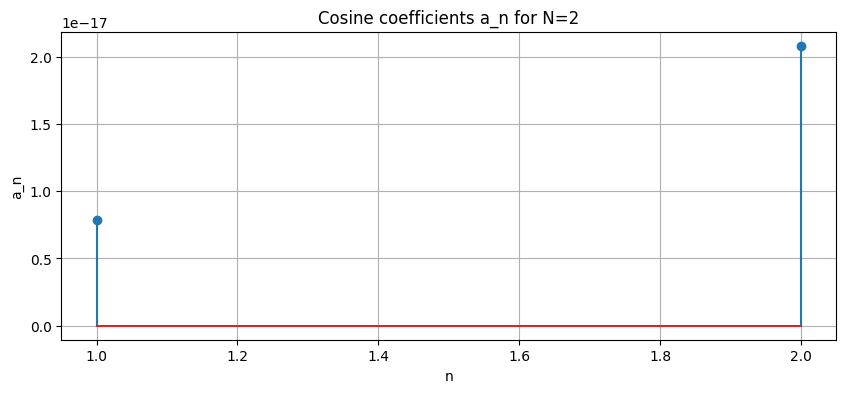

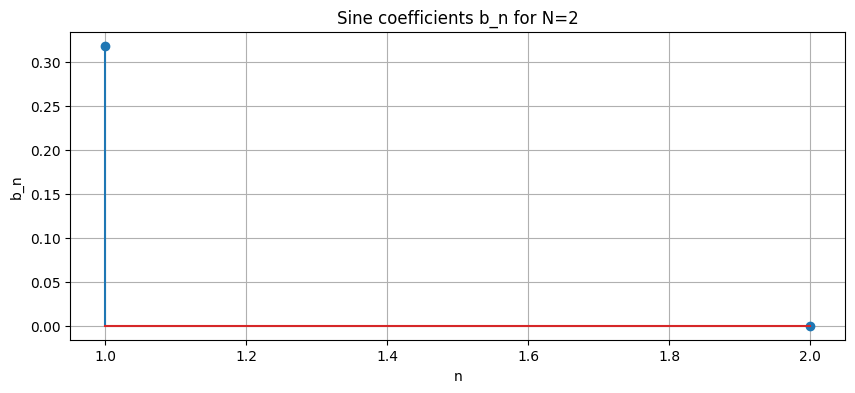

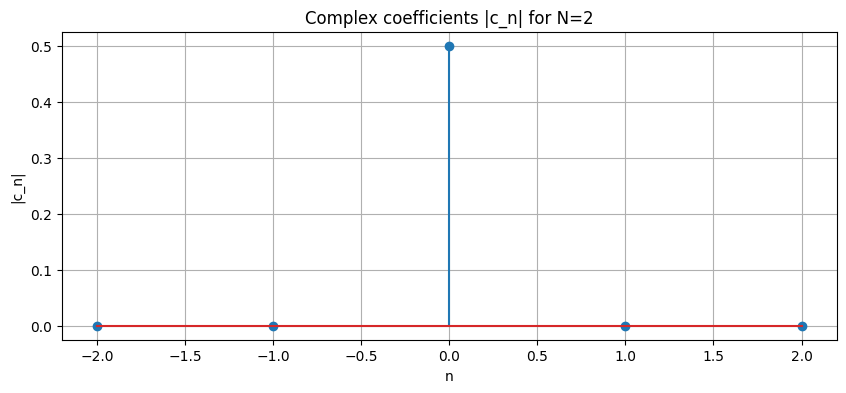

In [ ]:
N = 2
a0, an, bn, cn = compute_fourier_coeffs_numeric(N)

# Plot cosine coefficients a_n
plt.figure(figsize=(10, 4))
plt.stem(range(1, N+1), an)
plt.title(f'Cosine coefficients a_n for N={N}')
plt.xlabel('n'); plt.ylabel('a_n'); plt.grid(True); plt.show()

# Plot sine coefficients b_n
plt.figure(figsize=(10, 4))
plt.stem(range(1, N+1), bn)
plt.title(f'Sine coefficients b_n for N={N}')
plt.xlabel('n'); plt.ylabel('b_n'); plt.grid(True); plt.show()

# Plot complex coefficients |c_n|
plt.figure(figsize=(10, 4))
plt.stem(range(-N, N+1), [abs(c) for c in cn])
plt.title(f'Complex coefficients |c_n| for N={N}')
plt.xlabel('n'); plt.ylabel('|c_n|'); plt.grid(True); plt.show()


### Cell 4b: Fourier coefficients for N=41
We compute and plot the Fourier coefficients (a_n, b_n, |c_n|) for N=41.


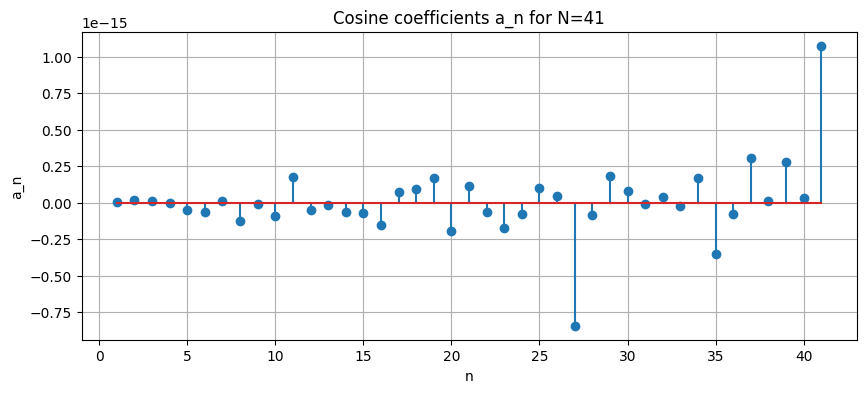

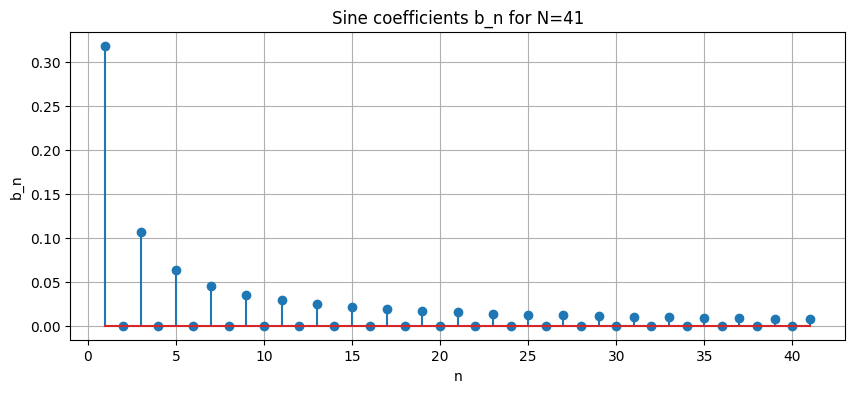

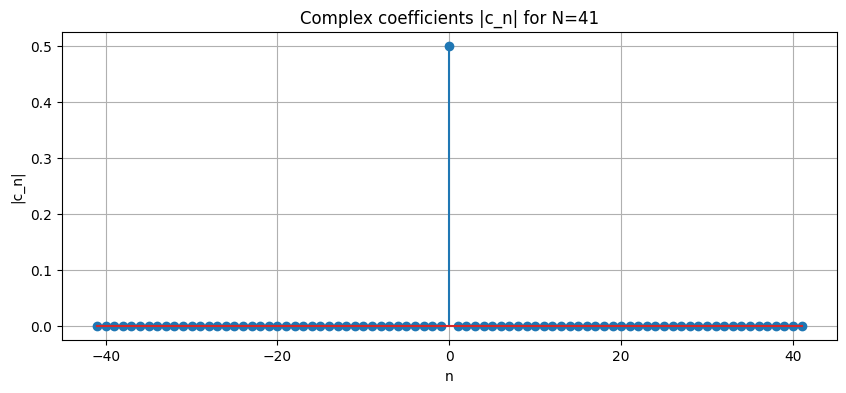

In [ ]:
N = 41
a0, an, bn, cn = compute_fourier_coeffs_numeric(N)

plt.figure(figsize=(10, 4))
plt.stem(range(1, N+1), an)
plt.title(f'Cosine coefficients a_n for N={N}')
plt.xlabel('n'); plt.ylabel('a_n'); plt.grid(True); plt.show()

plt.figure(figsize=(10, 4))
plt.stem(range(1, N+1), bn)
plt.title(f'Sine coefficients b_n for N={N}')
plt.xlabel('n'); plt.ylabel('b_n'); plt.grid(True); plt.show()

plt.figure(figsize=(10, 4))
plt.stem(range(-N, N+1), [abs(c) for c in cn])
plt.title(f'Complex coefficients |c_n| for N={N}')
plt.xlabel('n'); plt.ylabel('|c_n|'); plt.grid(True); plt.show()


### Cell 4c: Fourier coefficients for N=201
We compute and plot the Fourier coefficients (a_n, b_n, |c_n|) for N=201.


/tmp/ipython-input-3679280341.py:14: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  val_bn = (1/T) * integrate.quad(lambda tt: (1 if 0 <= tt <= 1 else 0) * np.sin(k*float(w0)*tt), 0, T)[0]
/tmp/ipython-input-3679280341.py:10: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  val_an = (1/T) * integrate.quad(lambda tt: (1 if 0 <= tt <= 1 else 0) * np.cos(k*float(w0)*tt), 0, T)[0]
/tmp/ipython-input-3679280341.py:19: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  val_cn = (1/T) * integrate.quad(lambda tt: (1 if 0 <= tt <= 

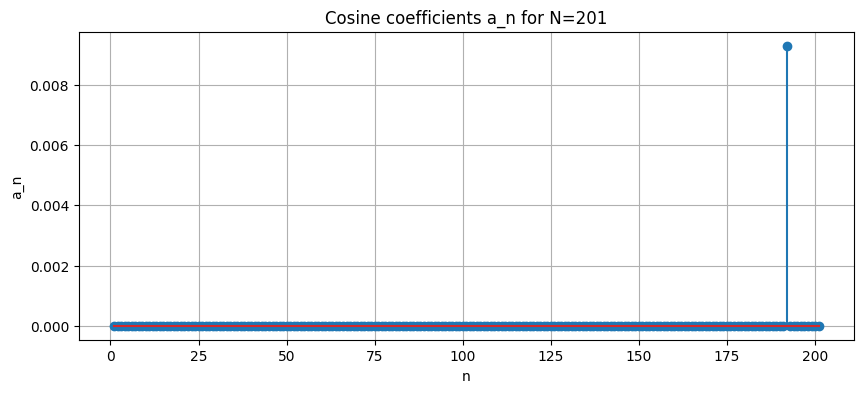

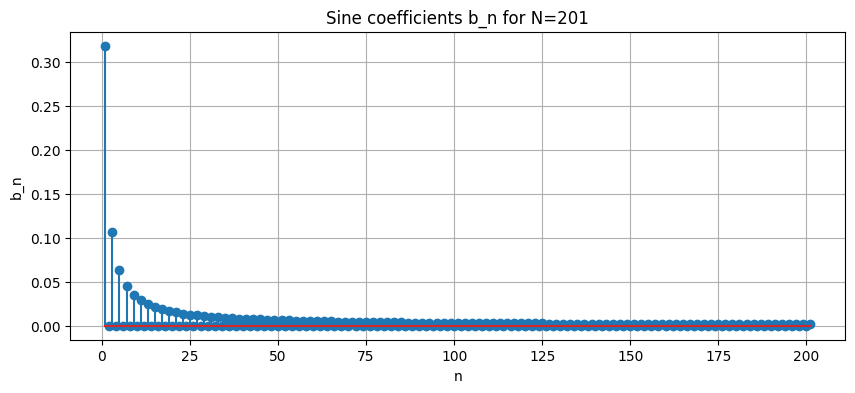

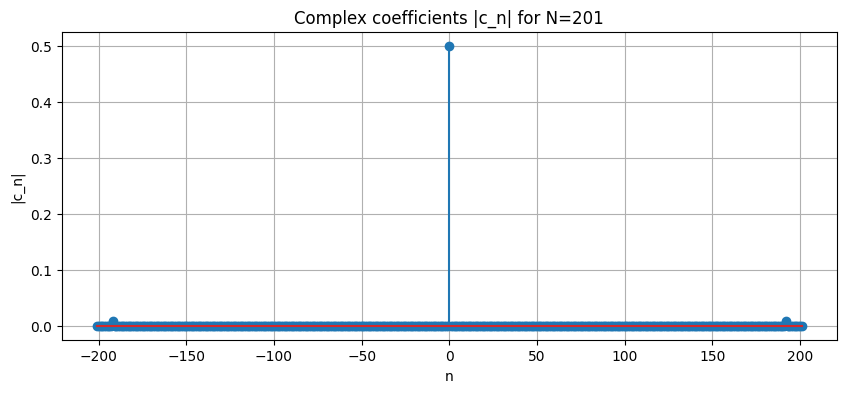

In [ ]:
N = 201
a0, an, bn, cn = compute_fourier_coeffs_numeric(N)

plt.figure(figsize=(10, 4))
plt.stem(range(1, N+1), an)
plt.title(f'Cosine coefficients a_n for N={N}')
plt.xlabel('n'); plt.ylabel('a_n'); plt.grid(True); plt.show()

plt.figure(figsize=(10, 4))
plt.stem(range(1, N+1), bn)
plt.title(f'Sine coefficients b_n for N={N}')
plt.xlabel('n'); plt.ylabel('b_n'); plt.grid(True); plt.show()

plt.figure(figsize=(10, 4))
plt.stem(range(-N, N+1), [abs(c) for c in cn])
plt.title(f'Complex coefficients |c_n| for N={N}')
plt.xlabel('n'); plt.ylabel('|c_n|'); plt.grid(True); plt.show()


### Cell 5: Signal and Fourier approximation
We plot the original signal x(t) alongside its Fourier approximation for each N.


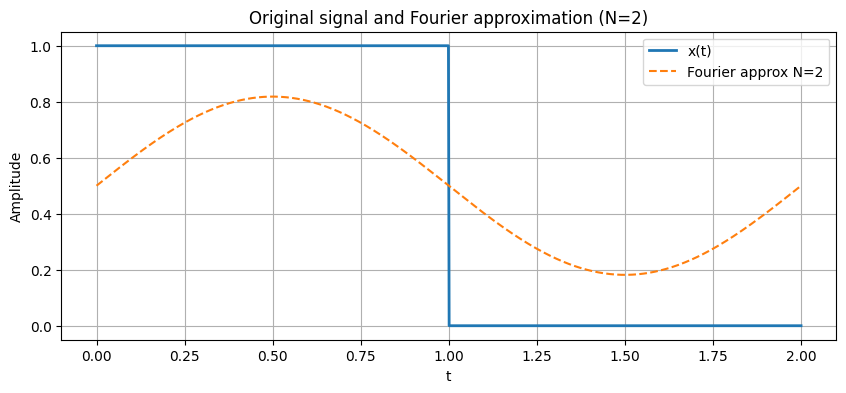

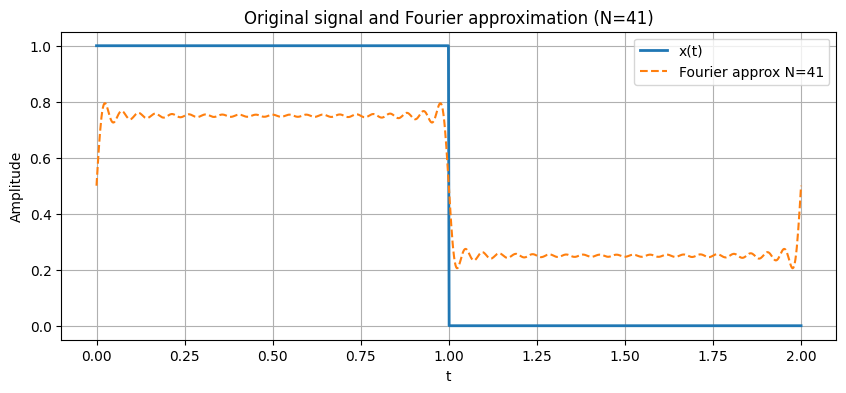

/tmp/ipython-input-3679280341.py:14: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  val_bn = (1/T) * integrate.quad(lambda tt: (1 if 0 <= tt <= 1 else 0) * np.sin(k*float(w0)*tt), 0, T)[0]
/tmp/ipython-input-3679280341.py:10: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  val_an = (1/T) * integrate.quad(lambda tt: (1 if 0 <= tt <= 1 else 0) * np.cos(k*float(w0)*tt), 0, T)[0]
/tmp/ipython-input-3679280341.py:19: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  val_cn = (1/T) * integrate.quad(lambda tt: (1 if 0 <= tt <= 

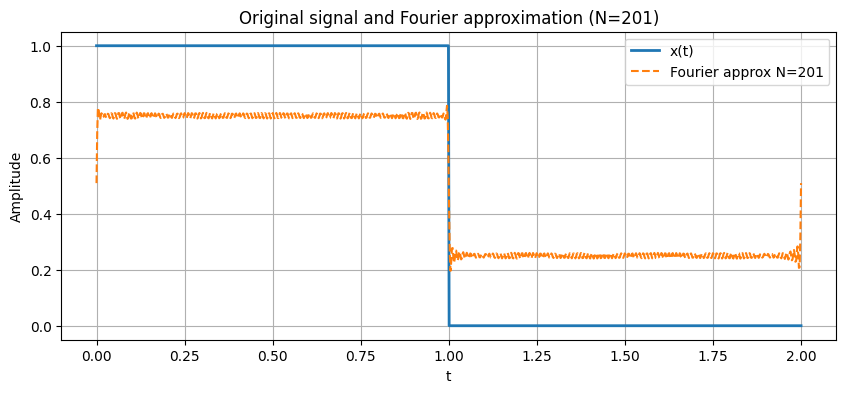

In [ ]:
for N in N_list:
    a0, an, bn, cn = compute_fourier_coeffs_numeric(N)
    y_vals = fourier_approx(t_vals, a0, an, bn, N)

    plt.figure(figsize=(10, 4))
    plt.plot(t_vals, x_vals, label='x(t)', linewidth=2)
    plt.plot(t_vals, y_vals, label=f'Fourier approx N={N}', linestyle='--')
    plt.title(f'Original signal and Fourier approximation (N={N})')
    plt.xlabel('t'); plt.ylabel('Amplitude')
    plt.legend(); plt.grid(True); plt.show()


# << Cell 5 - Result Analysis >>

### Final Analysis

**1. What does the final result mean?**  
The Fourier series reconstructs the periodic rectangular signal by summing sinusoids. As the number of terms increases (41 → 201), the approximation converges to the original shape over most of the interval.

**2. Is it consistent with Signals and Systems definitions?**  
Yes. The trigonometric Fourier series for a piecewise constant, periodic signal yields \(b_n=0\) and \(c_n\) decaying as \(1/n\), consistent with standard theory for discontinuous signals.

**3. What special property does the signal show?**  
It exhibits the Gibbs phenomenon: persistent oscillations near discontinuities that do not vanish but become more localized as terms increase.

**4. Do the plots and relations match theoretical expectations?**  
Yes. The closed-form coefficients and the stem plots match the expected parity and decay. The partial sums show improved accuracy with more terms while retaining Gibbs ripples near jumps.
